# Image Analysis: Using bag of visual words for scene classification.

## Training phase


Before extracting features we need to get our hands into a dataset and import the necessary packages and also used the **OpenCV Python Package (3.4.1)** in the implementation of this note, to download any version, go to [the official OpenCV website](https://opencv.org/releases.html)

In [1]:
# Import modules
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os
from imutils import paths
import pickle
%matplotlib inline

/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Getting the data

For the purpose of brevity, simplicity here we are going to use 3 categories, however, this algorithm can easily be expanded or scaled into any number of categories, although more efficient approaches may be needed for fast computation of the classification task. Caltech 101 with 101 categories is an example dataset of a lot of categories and images.

In [2]:
!wget https://cdn.talentsprint.com/aiml/Wise/training_set.zip

--2020-09-23 01:43:45--  https://cdn.talentsprint.com/aiml/Wise/training_set.zip
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935564 (914K) [application/zip]
Saving to: ‘training_set.zip’

training_set.zip    100%[===================>] 913.64K   936KB/s    in 1.0s    

2020-09-23 01:43:49 (936 KB/s) - ‘training_set.zip’ saved [935564/935564]



In [3]:
!unzip training_set.zip

Archive:  training_set.zip
   creating: training_set/
   creating: training_set/aeroplane/
  inflating: training_set/aeroplane/1.jpg  
  inflating: training_set/aeroplane/10.jpg  
  inflating: training_set/aeroplane/11.jpg  
  inflating: training_set/aeroplane/12.jpg  
  inflating: training_set/aeroplane/13.jpg  
  inflating: training_set/aeroplane/14.jpg  
  inflating: training_set/aeroplane/15.jpg  
  inflating: training_set/aeroplane/16.jpg  
  inflating: training_set/aeroplane/17.jpg  
  inflating: training_set/aeroplane/2.jpg  
  inflating: training_set/aeroplane/3.jpg  
  inflating: training_set/aeroplane/4.jpg  
  inflating: training_set/aeroplane/5.jpg  
  inflating: training_set/aeroplane/6.jpg  
  inflating: training_set/aeroplane/7.jpg  
  inflating: training_set/aeroplane/8.jpg  
  inflating: training_set/aeroplane/9.jpg  
   creating: training_set/bicycle/
  inflating: training_set/bicycle/1.jpg  
  inflating: training_set/bicycle/10.jpg  
  inflating: training_set/bicycle

### Exercise 1

### Load and define the Training path and also display the Training categories

In [ ]:
## your code here

### Exercise 2

In [ ]:
# Get all the path to the images and save them in a list
# image_paths and the corresponding label in image_paths
# The path is defined in the `train_path` variable.
# Also, the label is just a number in this case.
image_paths = []
image_classes = []
class_id = 0
for category in categories:
    dir = os.path.join(dataset_path, category)
    class_path = list(paths.list_images(dir)) # This is the path to all the images given A SINGLE CLASS
    # Stores the path to all the images in the images_paths variable which has all of the training images.
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path) # Assigns a label to each image path
    class_id+=1

## your code here to print the images classes
## your code here to print the length of the image classes

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
51


Thanks to the OpenCV library we can detect the SIFT keypoints and compute its correspondent descriptors, which can then be stored in a high-dimensional matrix for further computation

#### SIFT Note: 

Even though SIFT has different parameters, the paper by Lowe gives some empirical data which can be summarized as, number of octaves = 4, number of scale levels = 5, initial $\sigma = 1.6$, $k = \sqrt{2}$ etc as optimal values.

In [ ]:
## Run this cell to download the current opencv-python version
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

### Exercise 3

### Keypoints and Descriptors of all of the images

In [ ]:
# Detect SIFT Keypoints

## your code here

# List where all the descriptors will be stored
des_list = []
print("Calculating all the descriptors and keypoints...")
for image_path in image_paths:
    print("Calculating for image ["+ image_path +"]", end="\r")
    im  = cv.imread(image_path)

    ## your code here        # Converts from one color space to another (grayscale)

    kp, des = sift.detectAndCompute(gray,None)
    
    ## your code here        # Append the image path, key points, descriptors to the des_list

print("\nDone!")

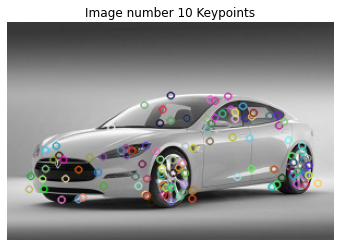

In [ ]:
# Example for the 3rd image
IMAGE_N = 10
im = cv.imread(des_list[IMAGE_N][0])
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
kp, des = sift.detectAndCompute(gray, None)
kpImg = cv.drawKeypoints(gray, kp, im)
plt.imshow(im, cmap='gray')
plt.axis("off")
plt.title("Image number "+str(IMAGE_N)+" Keypoints")
plt.show()

In [ ]:
# Stack all the descriptors vertically in a numpy array
print("Stacking all the descriptors in a numpy array...")
descriptors = des_list[0][2]
for image_path, keypoints, descriptor in des_list[1:]:
    print("Calculating for image ["+ image_path +"]", end="\r")
    descriptors = np.vstack((descriptors, descriptor))
print("\nDone!")

Stacking all the descriptors in a numpy array...
Calculating for image [training_set/aeroplane/7.jpg]
Done!


#### Save the descriptors variable in an external file.

In [ ]:
pickle.dump(descriptors, open('descriptors.sav', 'wb'))

### Apply K-means

Once we have all the descriptors, we must build a vocabulary, unlike words written in human languages, we do not have a strictly defined visual vocabulary, so that's why we use the unsupervised learning algorithm K-means to build it according to the collected SIFT descriptors of our images. This task can be computationally expensive, specially for a lot of categories and when executing the K-means algorithm more than once (in order to average results).

### Exercise 4

Performing K Means clustering on Descriptors

In [ ]:
## your code here

Here is where we compute the distance for each pseudo-word (SIFT descriptor) inside a document (image), to each of the means of the clusters (words); each SIFT descriptor has a cluster as a word, but we do not know which one, that is why we just assign to it the one that has the minimum distance.

In [ ]:
# Create the histogram itself of the image features
im_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    print("Calculating distance for image "+str(i)+"...", end="\r")
    words, distance = vq(des_list[i][2],voc)
    for w in words:
        im_features[i][w] += 1

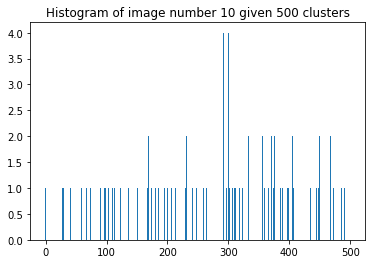

In [ ]:
plt.bar(range(k), im_features[IMAGE_N])
plt.title("Histogram of image number "+ str(IMAGE_N) +" given "+ str(k) + " clusters")
plt.show()

Also, a weighting schema can be useful to give more emphasis to the words that are more **discriminant**.

The number of times a term occurs in a document is called its **term frequency**. Is a way of weighting documents given a list of the words that form the document. That is, if a word appears a lot in a document, it may be important. Further weighting schemas can be done as well, such as the _inverse document frequency_. Given the term $t$ and its frequency in a document $i$, its **term frequency $tf_i$** is:

$$tf_i = t \cdot f_i$$

One can define the **document frequency** or $df_i$ as the number of occurences that any given term appears in a group of documents, hence the name. The **inverse document frequency** is a weighting scheme that takes into account the document frequency to apply weights to each word. Because, if a certain word appears in all of the documents, is not a discriminative word. The $idf_i$ weighting schema has the following equation:

$$idf_i = \log{\frac{N}{df_i}}$$

Where $N$ is the total number of documents, and thus, if the document frequency is low, it's a rare word which has a high weight.

We then can use the TF-IDF weighting for our features.

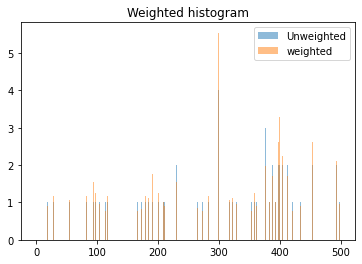

In [ ]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths) + 1) / (1.0*nbr_occurences + 1)), 'float32')
scaled_im_features = im_features * idf
plt.bar(range(k), im_features[IMAGE_N], alpha=0.5)
plt.bar(range(k), scaled_im_features[IMAGE_N], alpha=0.5)
plt.title("Weighted histogram")
plt.legend(['Unweighted', 'weighted'])
plt.show()

#### Feature normalization or scaling
The standard scaler allows us to normalize our already tf-idf weighted feature vector for each document (image). The normalization is defined as follows $Normalize(X) = \frac{X - \mu}{\sigma}$, where $\mu, \sigma$ represent the mean and the standard deviation respectively.

In [ ]:
# Scaling the words
stdSlr = StandardScaler().fit(scaled_im_features)
scaled_im_features = stdSlr.transform(scaled_im_features)

### Exercise 5 

### Train a Classifier and find the predictions

In [ ]:
### your code here